In [2]:
import numpy as np
%load_ext autoreload
%autoreload 2

In [3]:
from SERonEmoDB.data_ingest.data_ingest import EmoDataModule
from SERonEmoDB.feature_extraction.feature_extraction import TRANSFORMS

# 1. Thiết bị transform (MFCC) hoặc None nếu bạn muốn raw WAV
mfcc = TRANSFORMS.get("mfcc")

# 2. Khởi DataModule
dm = EmoDataModule(
    data_dir="../datas/EmoDB/wav/",
    batch_size=4,
    transform=mfcc,
    split_ratio=0.8
)

# 3. Chuẩn bị dữ liệu
dm.setup()

# 4. Lấy 1 batch từ train và val
train_dl = dm.train_dataloader()
val_dl = dm.val_dataloader()
print(f"Train batch count: {len(train_dl)}")
print(f"Val   batch count: {len(val_dl)}")

x_train, y_train = next(iter(train_dl))
x_val, y_val = next(iter(val_dl))

print(f"Train batch X shape: {x_train.shape}  →  [batch, n_mfcc or 1, frames]")
print(f"Train batch y shape: {y_train.shape}  →  [batch]")
print(f"Val   batch X shape: {x_val.shape}")
print(f"Val   batch y shape: {y_val.shape}")

Train batch count: 107
Val   batch count: 27
Train batch X shape: torch.Size([4, 40, 355])  →  [batch, n_mfcc or 1, frames]
Train batch y shape: torch.Size([4])  →  [batch]
Val   batch X shape: torch.Size([4, 40, 333])
Val   batch y shape: torch.Size([4])


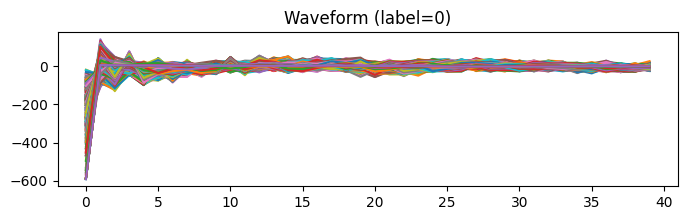

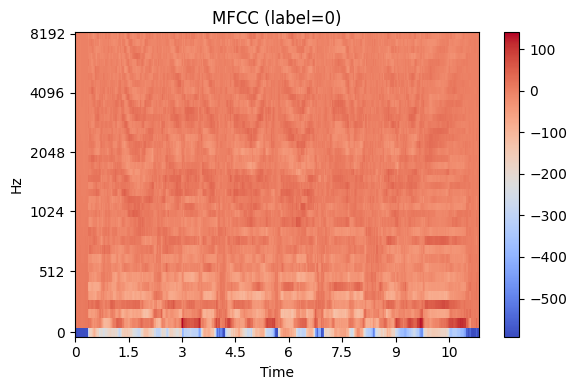

In [4]:
# x_train[0]: [n_mfcc, frames]
import librosa.display
import matplotlib.pyplot as plt

# chọn sample đầu trong batch
wave = x_train[0].squeeze().numpy()
plt.figure(figsize=(8,2))
plt.plot(wave)
plt.title(f"Waveform (label={y_train[0].item()})")
plt.show()

mfcc_feats = x_train[0].numpy().squeeze()
plt.figure(figsize=(6,4))
librosa.display.specshow(
    mfcc_feats,          # 2D: n_mfcc × T
    x_axis='time',
    y_axis='mel',
    sr=16000,
)
plt.colorbar()
plt.title(f"MFCC (label={y_train[0].item()})")
plt.tight_layout()
plt.show()


In [1]:
from SERonEmoDB.models.model import EmotionClassifier
from SERonEmoDB.data_ingest.data_ingest import EmoDataModule
from SERonEmoDB.feature_extraction.feature_extraction import TRANSFORMS

mfcc = TRANSFORMS.get("mfcc")

dm = EmoDataModule(
    data_dir="../datas/EmoDB/wav/",
    batch_size=64,
    transform=mfcc,
    split_ratio=0.8
)

dm.setup()
train_dl = dm.train_dataloader()
val_dl = dm.val_dataloader()

model = EmotionClassifier(n_classes=7, lr=1e-3, input_channels=40)

import lightning as pl  # hoặc import pytorch_lightning as pl

trainer = pl.Trainer(max_epochs=10)
trainer.fit(model, train_dl, val_dl)

/home/khoile/miniconda3/envs/weekly_projects/lib/python3.12/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3070 Ti Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2025-05-20 06:57:05.541105: I tensorflow/core/util

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/khoile/miniconda3/envs/weekly_projects/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (7) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [4]:
import torch
waveform = torch.randn(40, 16000)
print(waveform)


tensor([[ 2.1759e+00,  2.2066e-01, -2.9680e+00,  ...,  2.0307e-01,
         -4.7106e-01,  2.0120e-01],
        [-7.9169e-01, -7.4425e-01,  6.4874e-01,  ...,  1.6535e+00,
         -1.0360e+00, -8.2991e-01],
        [-1.6007e-01,  1.1235e+00, -2.1793e-01,  ...,  1.6459e-01,
          1.8808e+00,  3.4973e-01],
        ...,
        [ 1.8792e+00,  4.1627e-01,  4.1861e-01,  ...,  1.3551e+00,
         -1.1473e-01,  6.8370e-01],
        [-9.6956e-01, -2.3000e-01, -1.9547e+00,  ..., -8.2514e-02,
         -1.4123e-01, -1.0258e+00],
        [ 9.3850e-01,  1.2480e-01, -1.3466e+00,  ...,  3.9793e-01,
         -2.1338e-04, -1.6356e+00]])


In [4]:
import kagglehub
path = kagglehub.dataset_download("piyushagni5/berlin-database-of-emotional-speech-emodb")
print(path)


/home/khoile/.cache/kagglehub/datasets/piyushagni5/berlin-database-of-emotional-speech-emodb/versions/1
